In [30]:
import pandas as pd
import numpy as np
import os

np.random.seed(42)

n = 500

data = {
    "StudyHours": np.random.randint(1, 10, n),
    "Attendance": np.random.randint(60, 100, n),
    "AssignmentsCompleted": np.random.randint(0, 10, n),
    "FamilyIncome": np.random.randint(20000, 100000, n),
    "SleepHours": np.random.uniform(4, 9, n),
}

df = pd.DataFrame(data)

# Create realistic TestScore
df["TestScore"] = (
    df["StudyHours"] * 5 +
    df["Attendance"] * 0.3 +
    df["AssignmentsCompleted"] * 2 +
    df["SleepHours"] * 3 +
    np.random.normal(0, 5, n)
)

# Create Pass/Fail for stratified splitting
df["PassFail"] = (df["TestScore"] >= 50).astype(int)

folder = "data"
os.makedirs(folder, exist_ok=True)
df.to_csv(os.path.join(folder, "E:\git\Student_Performance_ML_Pipeline\data\student_performance.csv"), index=False)

print(" Dataset created successfully!")


<>:33: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
<>:33: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
C:\Users\user\AppData\Local\Temp\ipykernel_8952\3252342108.py:33: SyntaxWarning: "\g" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\g"? A raw string is also an option.
  df.to_csv(os.path.join(folder, "E:\git\Student_Performance_ML_Pipeline\data\student_performance.csv"), index=False)


 Dataset created successfully!


In [31]:

print(df.shape)
print(df.head())
print(df.info())
print(df.describe())


(500, 7)
   StudyHours  Attendance  AssignmentsCompleted  FamilyIncome  SleepHours  \
0           7          90                     5         20526    7.474755   
1           4          78                     5         88760    5.730499   
2           8          98                     7         67837    8.878051   
3           5          86                     0         31536    7.204860   
4           7          69                     6         48541    8.112403   

    TestScore  PassFail  
0   84.743690         1  
1   71.220731         1  
2  115.177566         1  
3   65.830837         1  
4   95.655261         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StudyHours            500 non-null    int32  
 1   Attendance            500 non-null    int32  
 2   AssignmentsCompleted  500 non-null    int32  
 3   FamilyIn

In [32]:
df.isnull().sum()

StudyHours              0
Attendance              0
AssignmentsCompleted    0
FamilyIncome            0
SleepHours              0
TestScore               0
PassFail                0
dtype: int64

array([[<Axes: title={'center': 'StudyHours'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'AssignmentsCompleted'}>],
       [<Axes: title={'center': 'FamilyIncome'}>,
        <Axes: title={'center': 'SleepHours'}>,
        <Axes: title={'center': 'TestScore'}>],
       [<Axes: title={'center': 'PassFail'}>, <Axes: >, <Axes: >]],
      dtype=object)

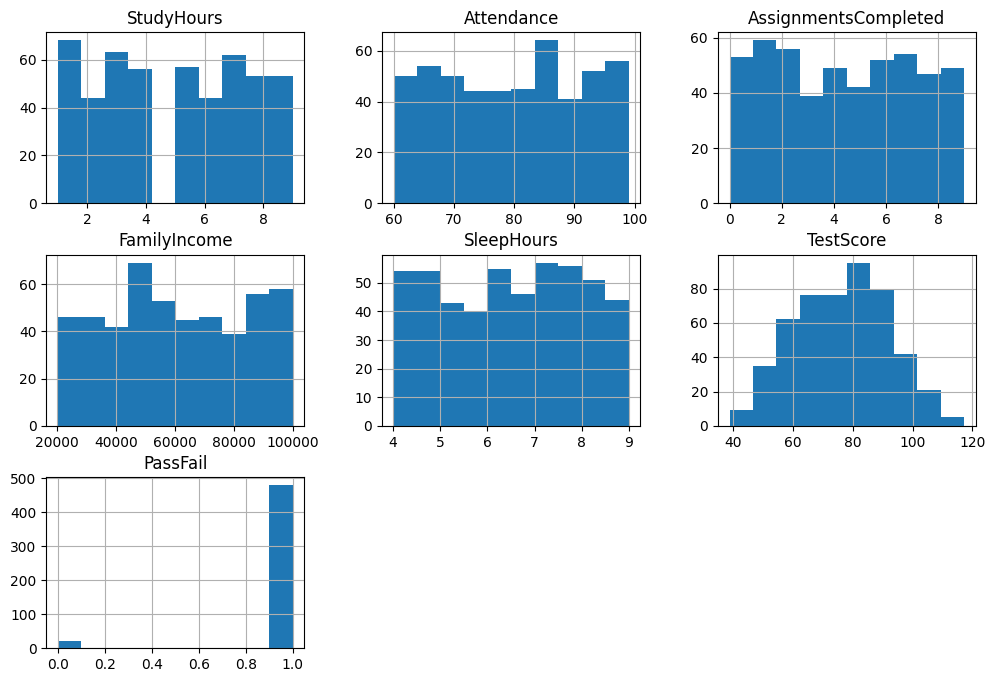

In [33]:
df.hist(figsize=(12,8))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()
plt.savefig(r"E:\\git\\Student_Performance_ML_Pipeline\\outputs\\correlation_heatmap.png")

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

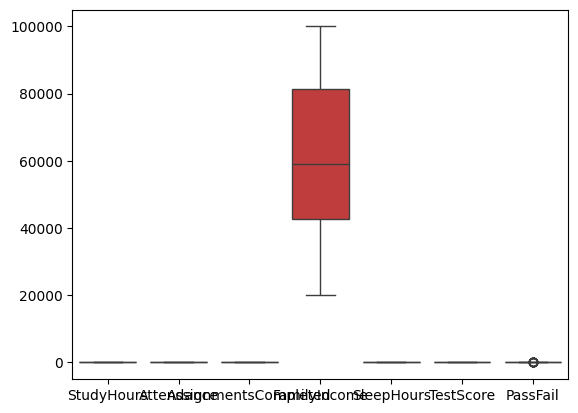

<Figure size 640x480 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()
plt.savefig(r"E:\\git\\Student_Performance_ML_Pipeline\\outputs\\boxplot_viz.png")

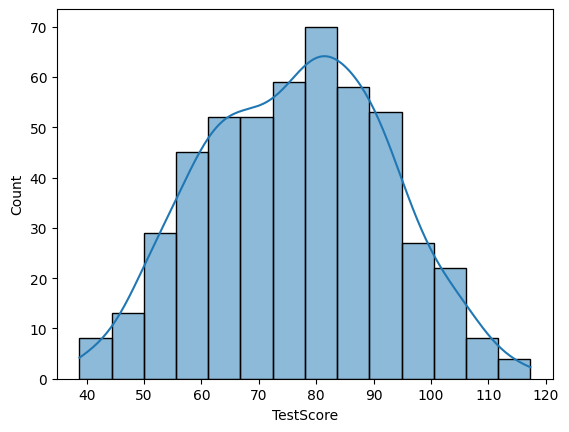

<Figure size 640x480 with 0 Axes>

In [36]:
sns.histplot(df["TestScore"], kde=True)
plt.show()
plt.savefig(r"E:\git\Student_Performance_ML_Pipeline\outputs\testscore_distribution.png")

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop("PassFail", axis=1)
y = df["PassFail"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
